<h1 align="center"><font size="15">Customer Segmentation</font></h1>

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.

# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

# Explore the data

In [2]:
cust_df = pd.read_csv('Cust_Segmentation.csv')
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
cust_df.count()

Customer Id        850
Age                850
Edu                850
Years Employed     850
Income             850
Card Debt          850
Other Debt         850
Defaulted          700
Address            850
DebtIncomeRatio    850
dtype: int64

In [4]:
cust_df.shape

(850, 10)

In [5]:
cust_df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [6]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [7]:
cust_df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [8]:
# renaming some of the columns
cust_df.rename(columns = {'Edu': 'Education'}, inplace = True)
cust_df.head()

,Customer Id,Age,Education,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [9]:
# we will drop the address variable as it is categorical variable bcz clustering algo needs continous numerical variable, and will drop other
# columns also, which is not suited to our analysis
df = cust_df.drop(['Defaulted', 'DebtIncomeRatio', 'Customer Id', 'Education', 'Years Employed', 'Address'],  axis  = 1)

df.head()

,Age,Income,Card Debt,Other Debt
0,41,19,0.124,1.073
1,47,100,4.582,8.218
2,33,57,6.111,5.802
3,29,19,0.681,0.516
4,47,253,9.308,8.908


In K means clustering our goal is to cluster the data with respect to any two attributes, considering the relation between them. If number of 
attributes relevant are more then PCA in employed to reduce the dimension to 2D or 3D to better analyze the clusters. 
Here it is a simple clustering of customers based on age and income, therefore we have seperated those two attributes into a numpy array. Conversly you can even make a dataframe too, although the motive here is little different

# Normalization

In [10]:
# Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different
# magnitudes and distributions equally. We use StandardScaler() to normalize our dataset, uniform scaling of data from 0
# This is a part of pre processing the data before we use it 

In [11]:
'''I want to transform only the income attribute and not the age, so below code may look weird. But it works ! 
Goal was to make a numpy array X which would have normalized income values but unchanged age values '''

from sklearn.preprocessing import StandardScaler
X1 = df.loc[:, ['Income']].values # X is numpy array
X2 = df.loc[:, ['Age']].values # X is numpy array
#X = np.nan_to_num(X)
X3 = StandardScaler().fit_transform(X1)
X = np.column_stack((X2, X3)) # this also is a numpy array
X

array([[41.        , -0.71845859],
       [47.        ,  1.38432469],
       [33.        ,  0.26803233],
       ...,
       [25.        , -0.74441888],
       [32.        , -0.484816  ],
       [52.        ,  0.44975434]])

In [12]:
# I have normalized both the set of columns by initially converting them into a numpy array
# from sklearn.preprocessing import StandardScaler
# X1 = df.loc[:, ['Age', 'Income']].values # X is numpy array
# #X = np.nan_to_num(X)
# X = StandardScaler().fit_transform(X1)
# X # this also is a numpy array


# Modelling

In [13]:
# finding the correct K value by elbow method, plotting sum of squares against value of k 
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X)
    # can : kmeans.fit(df[['column1', 'column2']]) if u have normalized columns individually
    sse.append(kmeans.inertia_) # kmeans has a parameter iniertia that gives u SSE
    # u just add the sse to the list created above for each value of K ie cluster
    # K will keep increasing by each iteration

In [14]:
sse

[55750.26470588235,
 17283.908946647352,
 8433.701202022774,
 5258.280032341683,
 3727.8060793184804,
 2674.720515631449,
 2157.4684726933547,
 1798.6420600383676,
 1599.2553428549647,
 1387.4543592639034]

<function matplotlib.pyplot.show(close=None, block=None)>

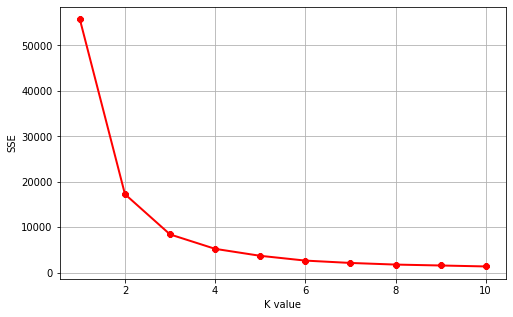

In [15]:
plt.figure(figsize = (8,5))
plt.grid()
plt.plot(range(1,11), sse, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K value')
plt.ylabel('SSE')
plt.show

In [16]:
# u can change the cluster size here, and manipulate the algorithm
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(X) 
# above u can use prdict(df[['coulmn1', 'coulmn2']]) if u have preprocessed individual columns 
print(label)

[2 1 2 0 1 2 2 2 0 1 1 2 0 1 0 0 0 1 1 2 0 2 0 1 2 1 0 2 2 2 2 2 0 2 0 2 2
 2 0 2 0 1 0 2 1 1 0 0 0 0 1 2 0 1 0 2 0 0 2 1 2 2 2 1 0 0 2 0 2 0 0 2 0 0
 0 2 1 2 2 1 2 0 2 2 1 0 0 0 0 0 2 2 0 0 2 1 2 2 0 0 0 2 2 1 0 1 2 0 2 2 2
 0 0 0 0 2 0 2 0 2 0 0 2 2 0 1 0 0 0 0 2 2 0 0 0 2 1 0 1 2 2 0 0 0 2 0 2 1
 0 0 2 1 2 1 2 2 2 1 0 0 0 2 2 0 0 2 0 0 0 1 2 0 0 0 0 1 2 0 0 1 2 2 0 1 2
 0 1 2 2 1 0 1 2 2 2 2 0 1 1 2 1 2 0 2 1 1 2 1 2 0 0 2 2 1 2 0 2 0 2 1 0 2
 0 0 0 0 1 0 2 1 2 2 0 0 2 0 1 0 0 0 0 2 0 0 1 1 1 2 2 0 0 0 2 2 1 0 2 0 0
 0 2 0 0 0 1 1 0 2 2 1 2 0 2 2 2 0 0 2 0 0 0 1 2 0 1 2 2 0 2 2 0 1 2 2 0 0
 0 0 0 2 2 2 0 2 0 2 2 0 2 2 0 0 1 0 2 0 2 0 2 2 2 2 1 0 0 2 0 0 2 2 2 1 0
 1 2 1 0 1 2 1 2 2 2 1 2 2 0 0 0 2 1 0 2 0 0 1 2 2 0 0 2 2 0 0 1 0 2 1 1 2
 0 0 1 1 0 2 0 2 0 0 2 0 0 1 1 2 1 0 2 2 2 0 2 0 0 0 0 1 2 2 0 0 0 0 0 1 1
 1 0 1 0 2 0 2 0 1 2 2 2 2 2 2 0 2 1 1 1 1 2 0 2 1 0 0 2 2 2 0 1 2 2 1 2 1
 2 0 2 2 1 2 2 2 0 2 1 2 0 2 0 1 1 2 0 2 0 1 2 0 0 1 1 2 2 2 1 0 1 2 0 0 0
 2 2 0 2 0 2 2 0 0 0 2 2 

In [17]:
# printing the centroids of the cluster
print(kmeans.cluster_centers_) # x and y coordinates of 3 centeroids as we have 3 clusters

[[27.38547486 -0.43826152]
 [47.2804878   0.78043142]
 [37.24695122  0.08813071]]


In [18]:
# way of appending the dataframe where we add a new column to clusters
df['Cluster'] = label
df.head(5)

,Age,Income,Card Debt,Other Debt,Cluster
0,41,19,0.124,1.073,2
1,47,100,4.582,8.218,1
2,33,57,6.111,5.802,2
3,29,19,0.681,0.516,0
4,47,253,9.308,8.908,1


In [19]:
df.groupby('Cluster').mean()

,Age,Income,Card Debt,Other Debt
Cluster,,,,
0,27.385475,29.793296,1.058307,2.056109
1,47.280488,76.737805,2.463280,4.880201
2,37.246951,50.070122,1.699527,3.294259


# Look at the clusters

Now, lets look at the distribution of customers based on their age and income:


<function matplotlib.pyplot.show(close=None, block=None)>

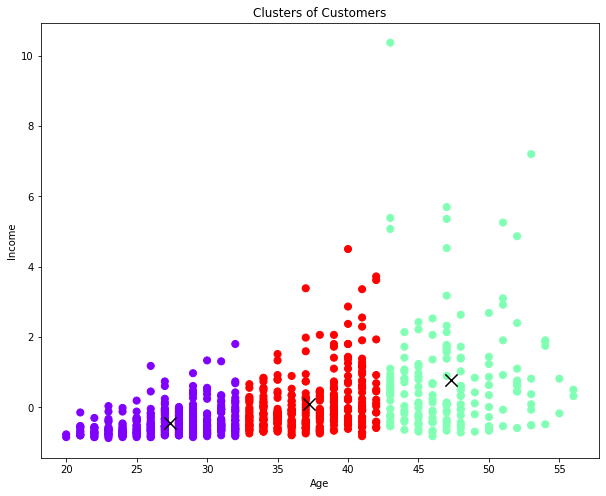

In [20]:
plt.figure(figsize = (10,8))

plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_, cmap = 'rainbow', s = 50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = 'x', s = 150, color = 'black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show

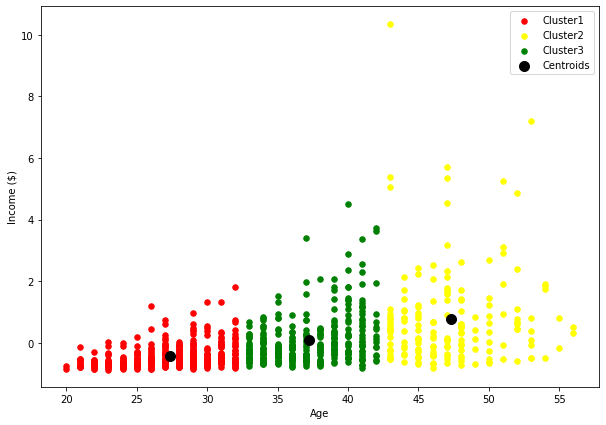

In [21]:
# Another way to look at the clusters
plt.figure(figsize = (10,7))

plt.scatter(X[label == 0, 0], X[label == 0, 1], s = 30, c = 'red', label = 'Cluster1')
plt.scatter(X[label == 1, 0], X[label == 1, 1], s = 30, c = 'yellow', label = 'Cluster2')
plt.scatter(X[label == 2, 0], X[label == 2, 1], s = 30, c = 'green', label = 'Cluster3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.xlabel('Age') 
plt.ylabel('Income ($)') 
plt.legend() 

plt.show()